In [5]:
import pandas as pd
import matplotlib.pyplot as plt


def draw(start=None, end=None, fieldname=None, filename="custom_metrics.csv"):
    # Read the CSV file
    df = pd.read_csv(filename)
    if start is None:
        start = 0
    if end is None:
        end = len(df)
    # Filter the dataframe based on start and end row indices
    df_filtered = df.iloc[start:end]
    if isinstance(fieldname, list):
        # Plot the time series for the specified fields
        for field in fieldname:
            plt.plot(df_filtered.index, df_filtered[field], label=field)
        plt.xlabel("Row Index")
        plt.ylabel("Field Values")
        plt.title("Time Series of All Fields")
        plt.legend(loc="upper right")
    if fieldname == "all" or fieldname is None or fieldname == "":
        # Extract all fieldnames except for episode_number and episode_id
        fieldnames = df_filtered.columns.tolist()
        fieldnames.remove("episode_number")
        fieldnames.remove("episode_id")

        # Plot all fields in the same figure
        for field in fieldnames:
            plt.plot(df_filtered.index, df_filtered[field], label=field)

        plt.xlabel("Row Index")
        plt.ylabel("Field Values")
        plt.title("Time Series of All Fields")
        plt.legend(loc="upper right")
    else:
        # Plot the time series for the specified field
        plt.plot(df_filtered.index, df_filtered[fieldname])
        plt.xlabel("Row Index")
        plt.ylabel(fieldname)
        plt.title(f"Time Series of {fieldname}")

    plt.show()

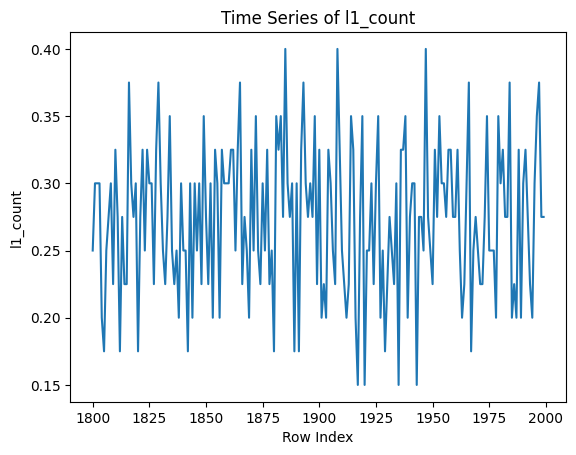

In [13]:
draw(start=1800, end=2000, fieldname="l1_count")